## Heart Disease Prediction ML Model

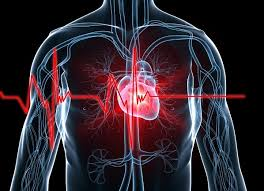

## Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

## STEP 1 Import Important Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Succesfully!!')

All Modules Loaded Succesfully!!


## STEP 2 Loading Data

In [2]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


## STEP 3 Understanding Data using EDA

In [3]:
#3.1 Data Head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#3.2 Data Tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#3.3 Data Shape
df.shape

(303, 14)

In [6]:
#3.4 Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#3.5 Data Columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Desc

- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [8]:
#Domain Knowledge(zaruri hai for ML projects)

###### 3.7 Checking Null Values/Counts

In [9]:
df.isna().sum()
#No null values found
#In Case of null values  :--> remove, fill, replace, drop

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8 Column Stats


In [10]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


###### 3.9 Each column univariate analysis



In [11]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('=================',end = '\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Column_sex [1 0]

Column_cp [3 2 1 0]

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

###### 3.10 Each Numerical Features Hist plot Distribution

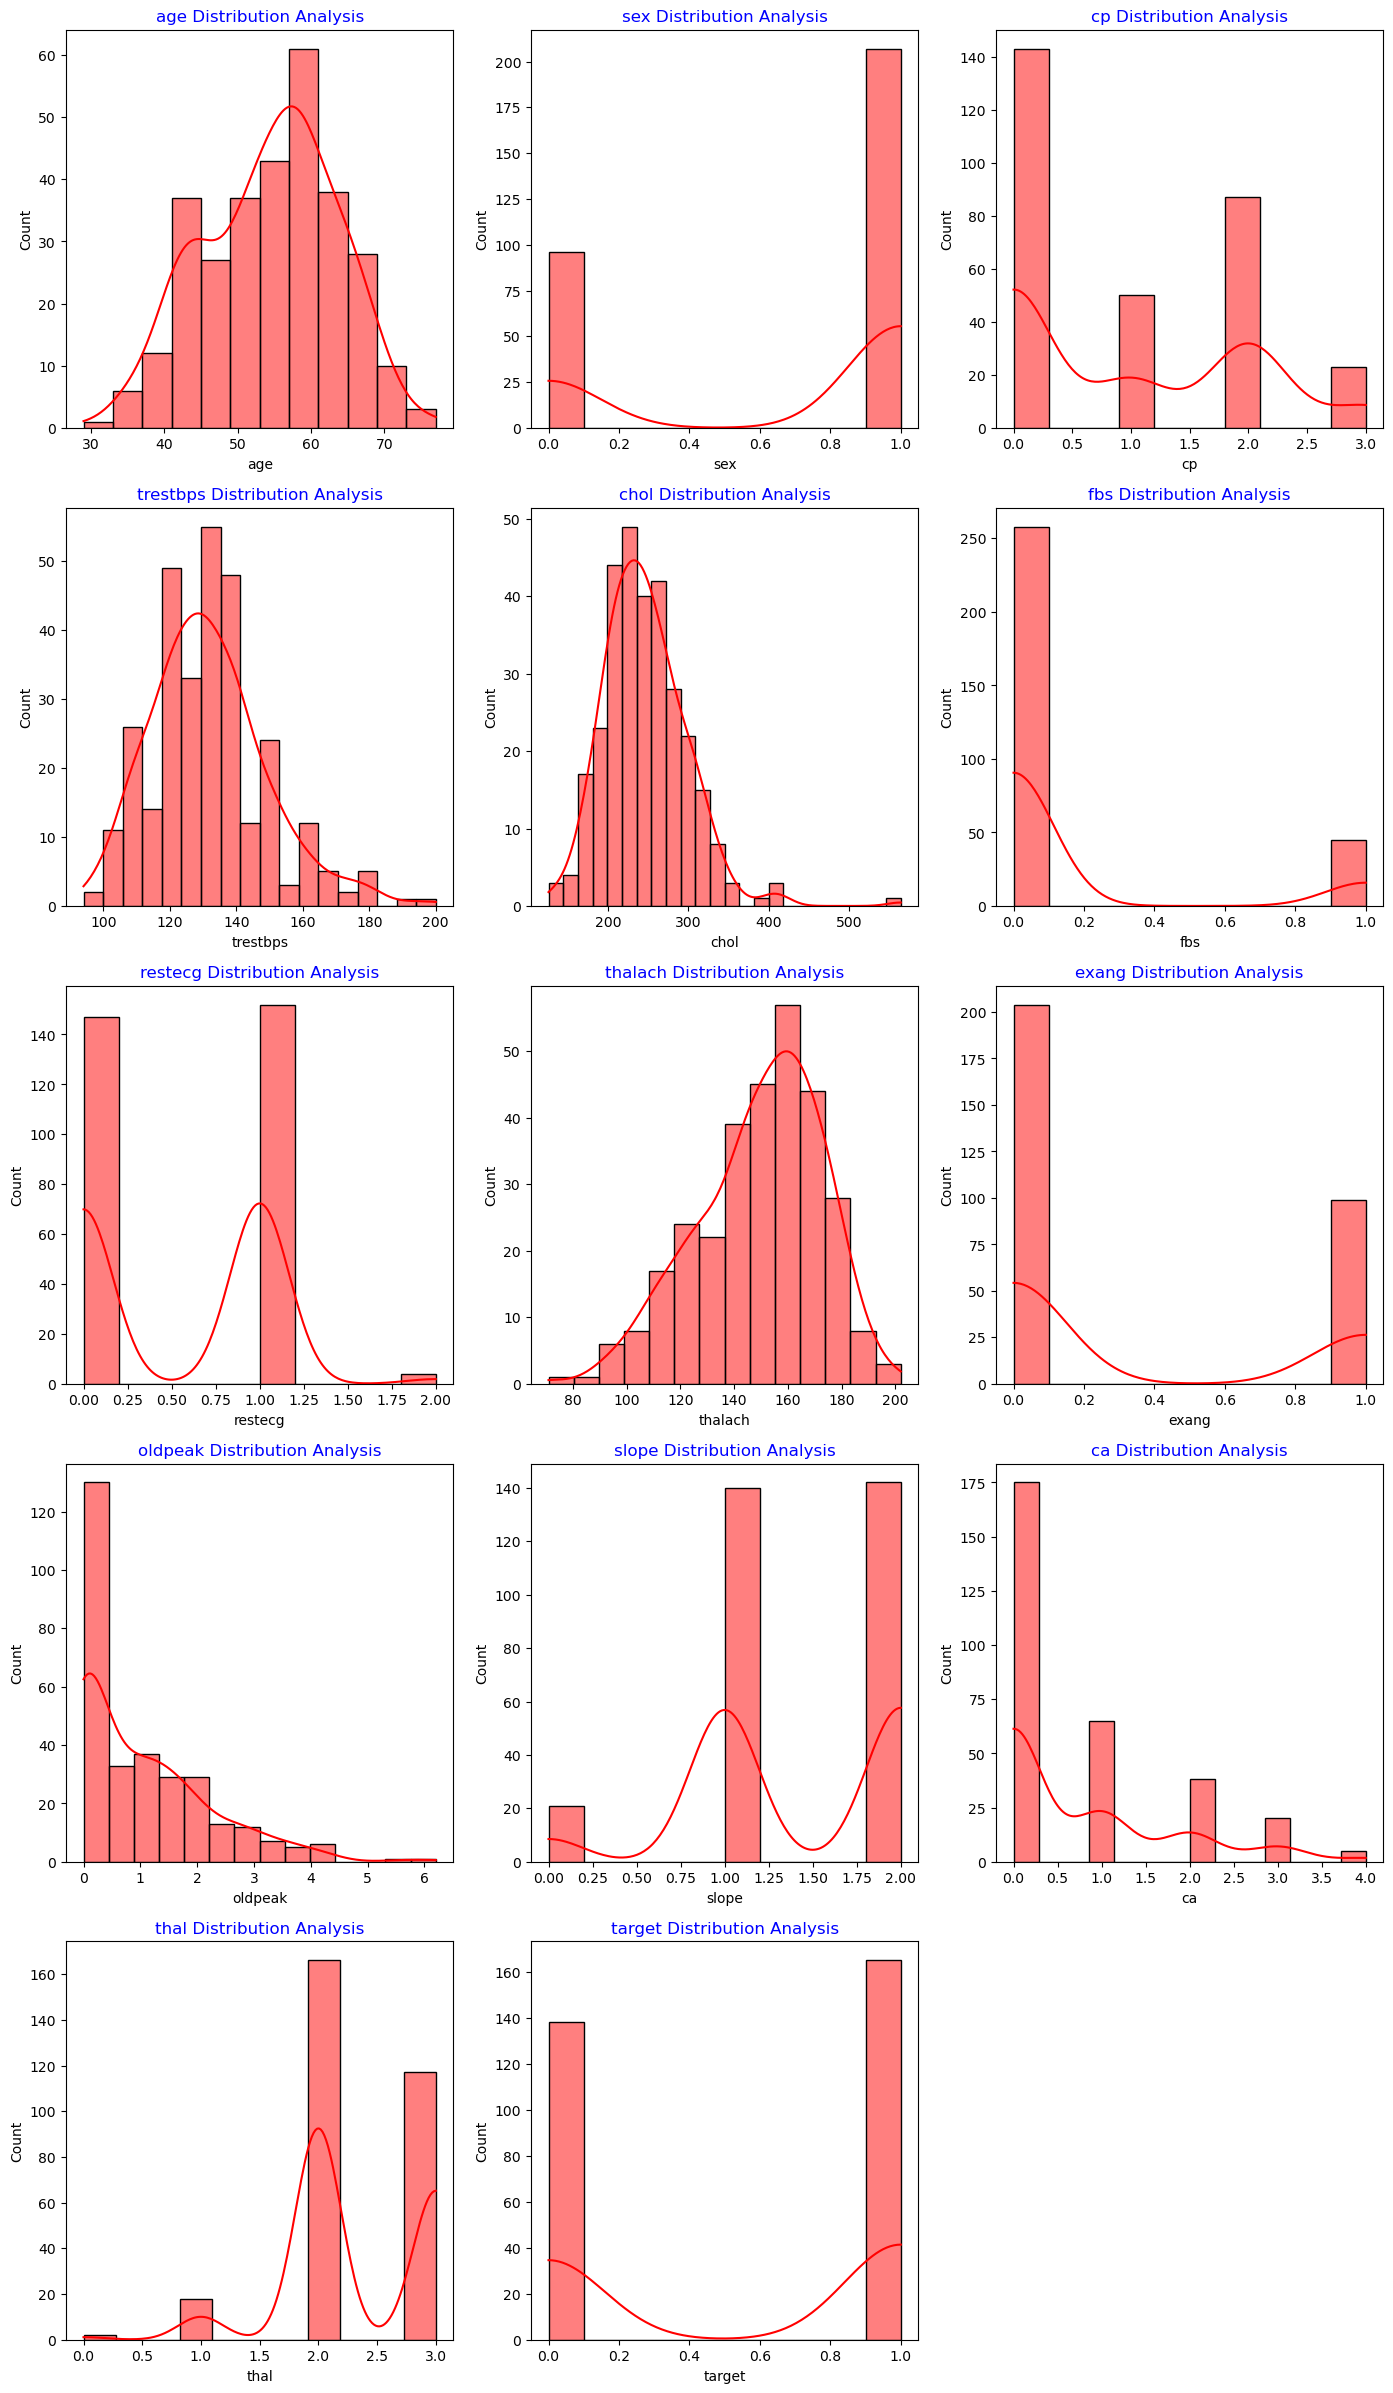

In [12]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color = 'Blue')
    sns.histplot(df[j],kde = True,color = 'r')
plt.savefig('All Numerical Features Analysis.jpeg',dpi =500)
plt.show()


In [13]:
#Target col not that much imbalance, we can proceed, if imbalance found we need to balance using sampling

###### 3.11 Bivariate Analysis, to check Correlation of features vs target

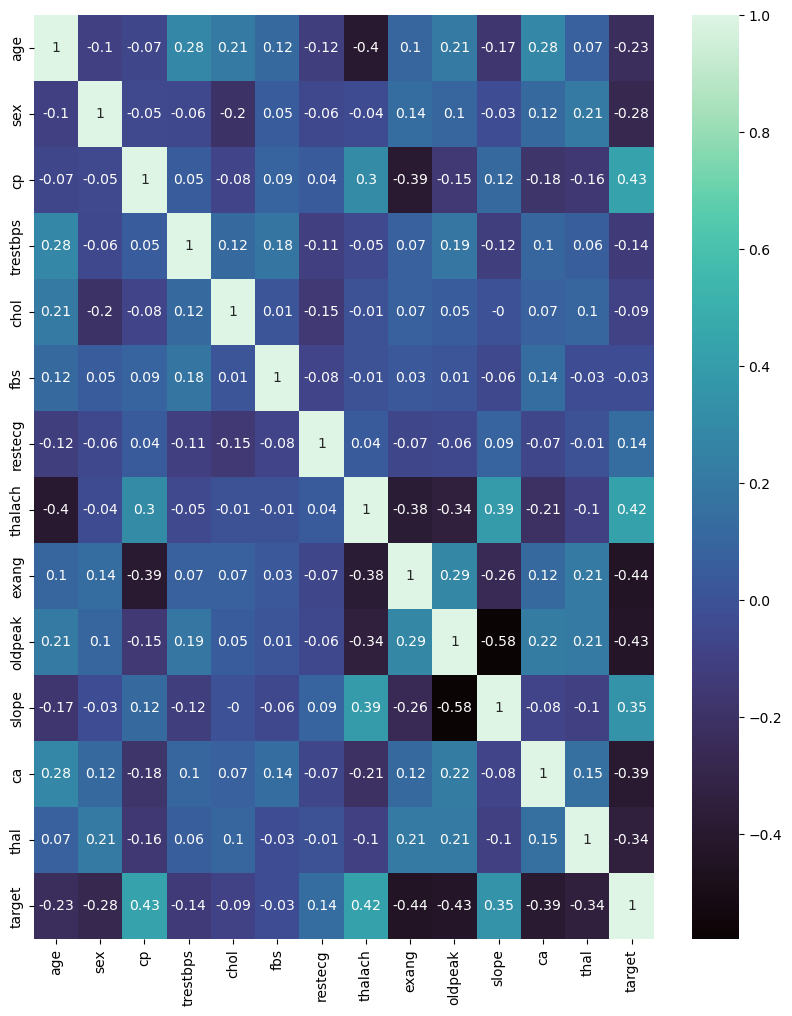

In [14]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot = True)
plt.show()

In [15]:
######  3.12 Target vs Features

df.corr()['target'].sort_values(ascending = False).reset_index()

,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


In [16]:
df.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

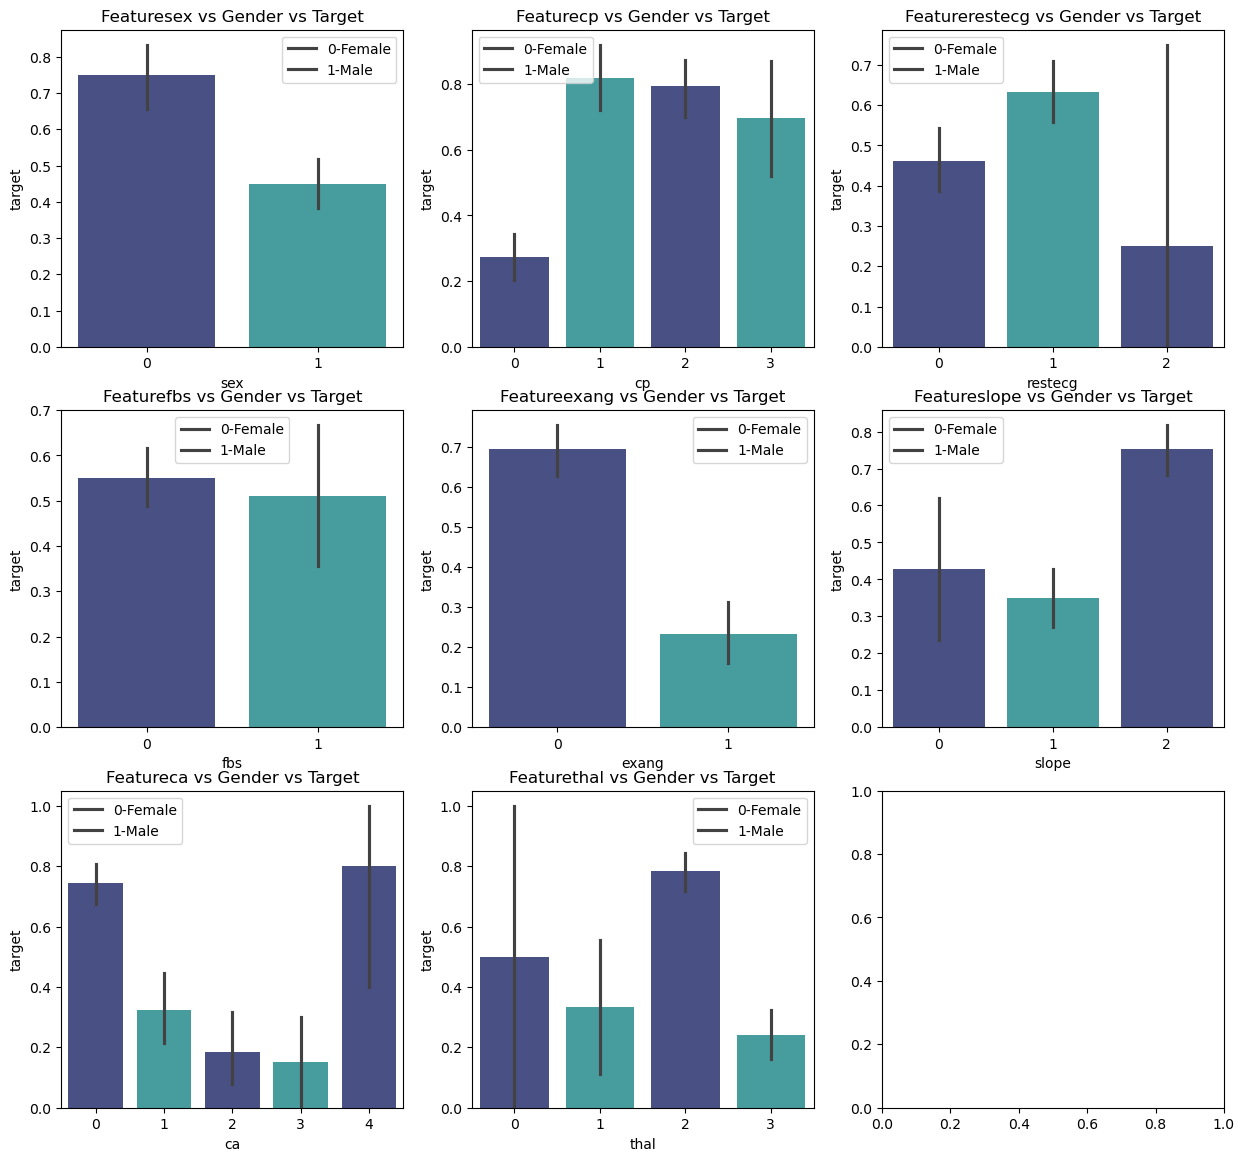

In [17]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope','ca','thal']
plt.figure(figsize=(15,14))
for i in range (r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature{x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x =x_col[i], y ='target', palette=sns.color_palette('mako',2))
        plt.legend(['0-Female','1-Male'])
    except:
        ...

plt.show()

###### 3.13 Pairplot featurrs vs Target

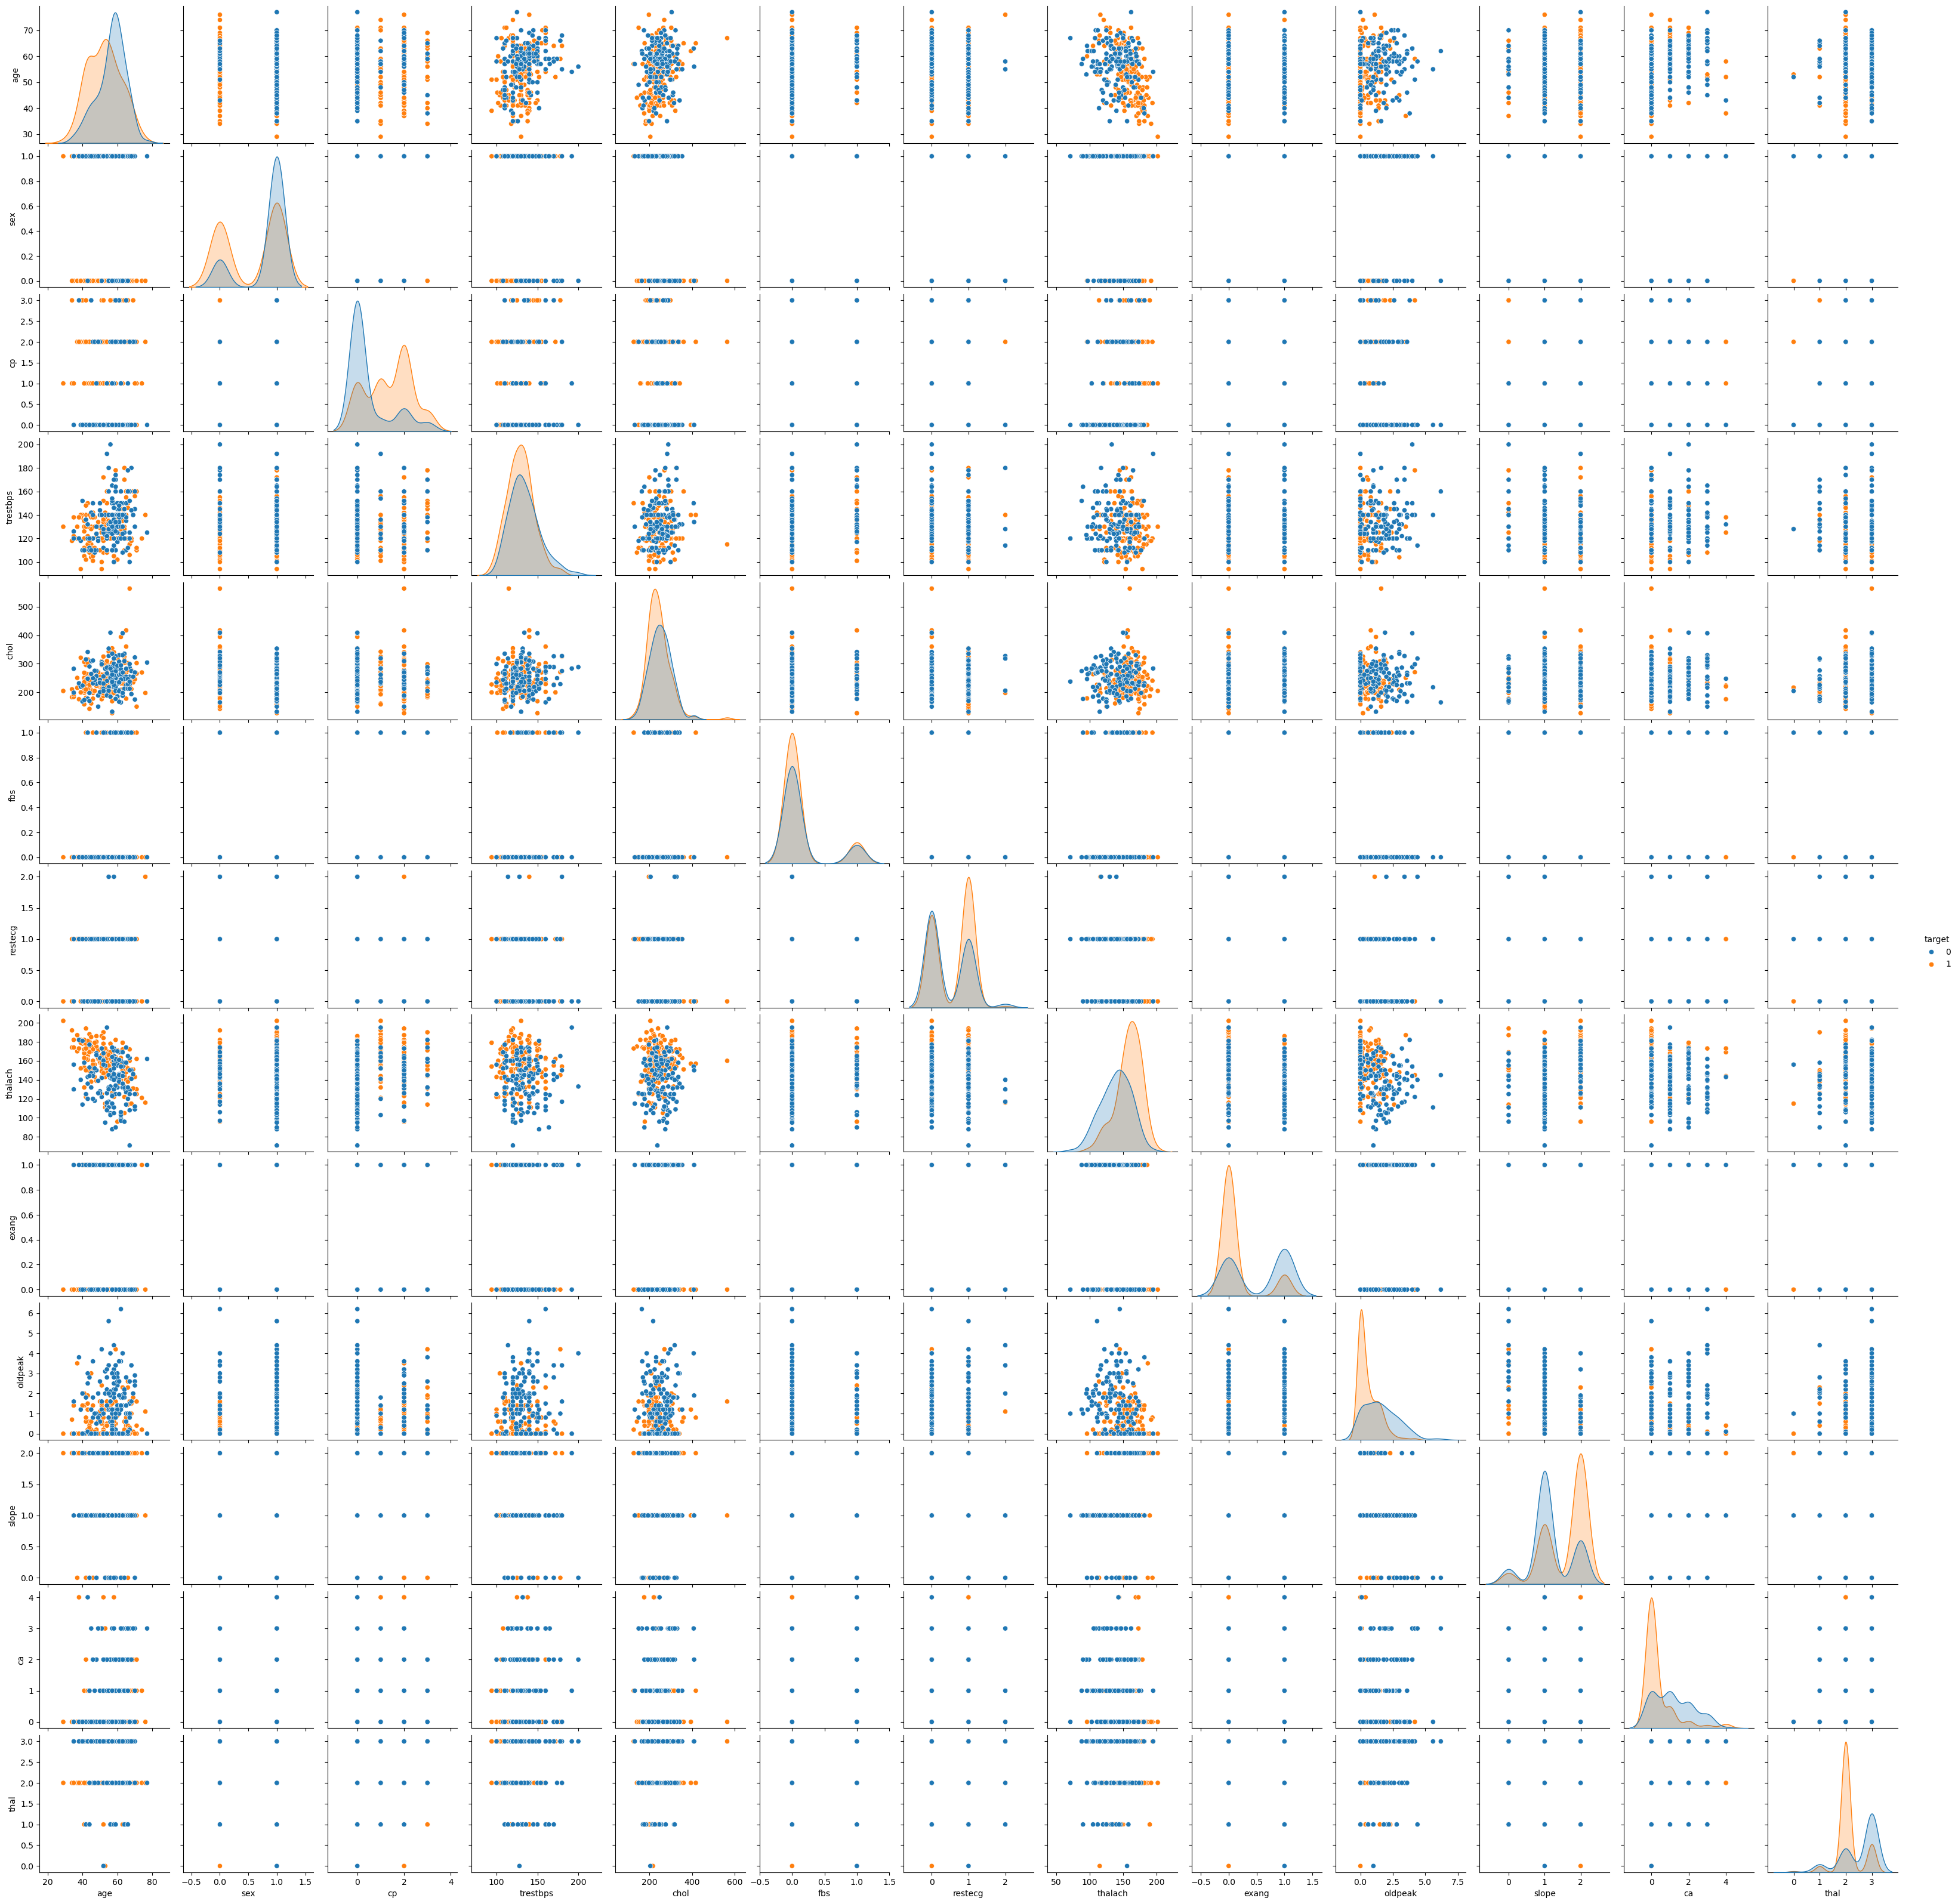

In [18]:
sns.pairplot(data=df, hue='target')   
plt.show()

## STEP 4 Divide Data into Train and Test


###### Train Test Split

In [19]:
#4.1 Divide data into Targets and Features

X = df.iloc[:,:-1]
y =df['target']

In [20]:
X.shape, y.shape

((303, 13), (303,))

In [21]:
#4.2 Train - test split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state = 42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## STEP 5 Multi Model Creation

In [23]:
#because target value : only: 0,1(Binary Classification),
#this is not regression problem,

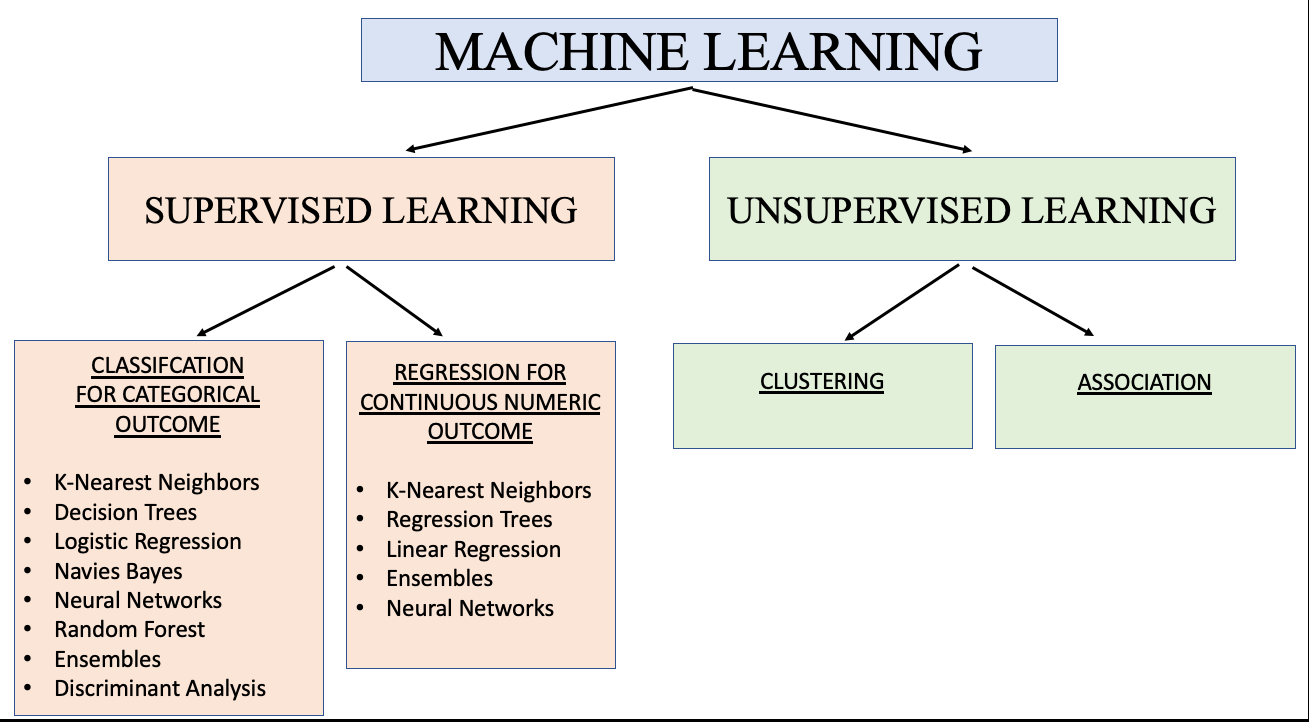

### 5.1 Logistics Regression Model

In [24]:
# It uses the concept of Sigmoid Function:---> Linear points converted to Sigmoid (S) curve

In [25]:
#y_pred = mx+c

In [26]:
# z = y_pred

# y_pred = Linear Regression

# Sigmoid function convert linear line to curve

# Logistics Regression: we can solve binary and multiclass classification 

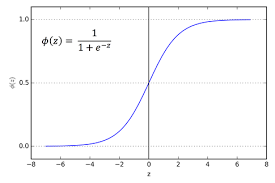

In [27]:
#step 5.1.1 Imoort Logistic regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)       #training / model building(learn pattern in this step)

LogisticRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

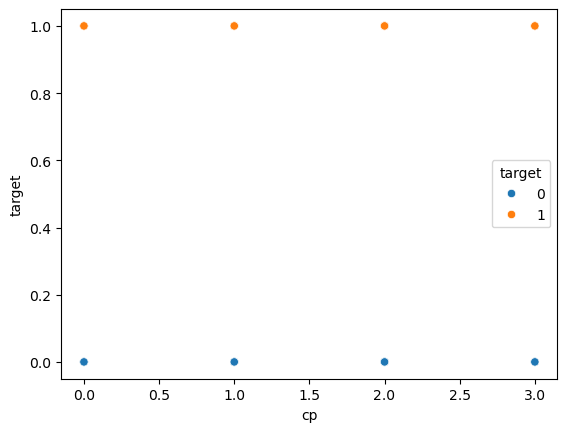

In [28]:
sns.scatterplot(data = df, x='cp', y='target', hue='target')
plt.show

In [29]:
y_pred = model_lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [30]:
#5.1.2 Import model evaluation metrices
#it will be called only when problem is of CLASSIFICATION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [31]:
#5.1.3 Import Confusion Matrics to Evaluate classification model
from sklearn.metrics import confusion_matrix

In [32]:
#Error: Comparison: if SCORE tie
#Type1, Type2: Type1 error is dangerous

In [33]:
cm = confusion_matrix(y_test,y_pred)

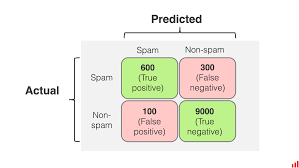

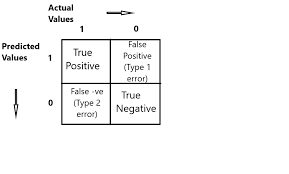

In [34]:
print(cm)

[[25  4]
 [ 3 29]]


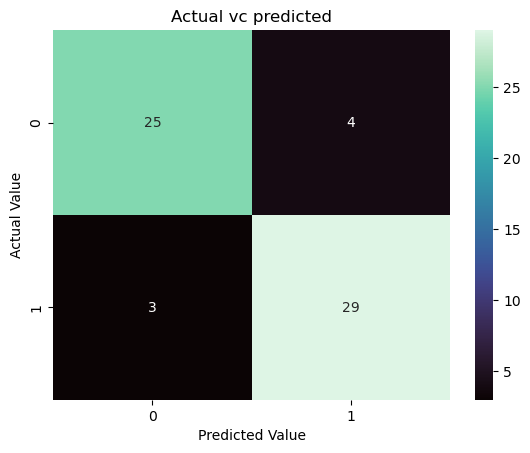

In [35]:
plt.title('Actual vc predicted')
sns.heatmap(cm,annot = True, cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [36]:
cm.ravel()

array([25,  4,  3, 29])

In [37]:
TN,FP,FN,TP = cm.ravel()

In [38]:
precision_score(y_test,y_pred)

0.8787878787878788

In [39]:
ps = TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [40]:
acs = (TN+TP)/cm.sum()
acs

np.float64(0.8852459016393442)

In [41]:
print(accuracy_score(y_test,y_pred))

0.8852459016393442


In [42]:
rs = recall_score(y_test,y_pred)
print('Recall Score is: ',rs)

Recall Score is:  0.90625


In [43]:
#F1 Score to evaluate both precision and recall score

In [44]:
f1_sc = f1_score(y_test,y_pred)

In [45]:
print('F1 Score: ',f1_sc)

F1 Score:  0.8923076923076924


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



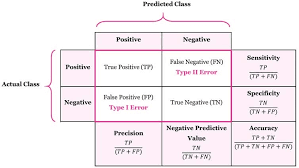

In [47]:
#5.1.4 Checking Model Score
#Model Score same as accuracy score
lr_score = model_lr.score(X_test,y_test)
print('LogisticRegression Score ',lr_score)

LogisticRegression Score  0.8852459016393442


### 5.2 Naive Bayes ML Model

In [48]:
# pre assumption: it will pre-assume NO correlation b/w features

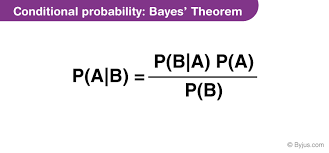Bayes Theorem:

###### 5.2.1 Import Navie Model

In [49]:
from sklearn.naive_bayes import GaussianNB
#GaussianNB only be used in case of binary classification
#MultinomialNB only be used in case of multi-class classification

model_nv = GaussianNB()

model_nv.fit(X_train,y_train)    #train part/ learning

GaussianNB()

In [50]:
y_pred = model_nv.predict(X_test)

In [51]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score: ',nv_score)

Naive Bayes Score:  0.8688524590163934


In [52]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F_1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.8688524590163934
Precision Score 0.9
Recall Score 0.84375
F_1 Score 0.8709677419354839


In [52]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F_1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.8688524590163934
Precision Score 0.9
Recall Score 0.84375
F_1 Score 0.8709677419354839


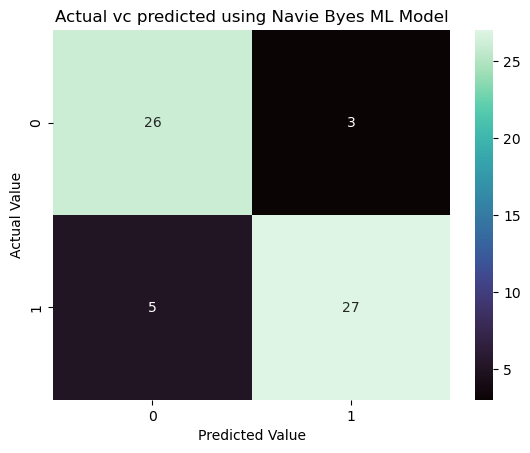

In [53]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vc predicted using Navie Byes ML Model')
sns.heatmap(cm,annot = True, cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [55]:
# Model>y_pred>all_score>confusion_matrics>classification_report
# Model>y_pred>all_score>confusion_matrics>classification_report
# Model>y_pred>all_score>confusion_matrics>classification_report
# Model>y_pred>all_score>confusion_matrics>classification_report
# Model>y_pred>all_score>confusion_matrics>classification_report
# Model>y_pred>all_score>confusion_matrics>classification_report



# best model--> error(low), accuracy score(high)
#Deploy

### STEP 5.3 Support Vector Machine ML Model

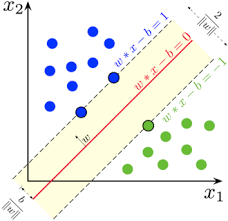

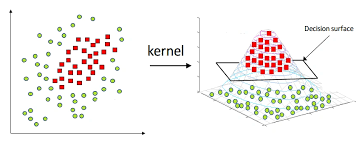

In [60]:
#SVM works on Support Vectors of nearest data points of different classes
#It will create line, plane or hyperplane
#We can use this for both regression problem and classification(Binary/Multiclass)

### STEP 5.3.1 Import SVM Model

In [59]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC()

###### STEP 5.3.2 Predict X_test

In [61]:
y_pred = model_svc.predict(X_test)

###### STEP 5.3.3 Checking Scores and Confusion Matrix

In [62]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F_1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.7049180327868853
Precision Score 0.6666666666666666
Recall Score 0.875
F_1 Score 0.7567567567567568


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



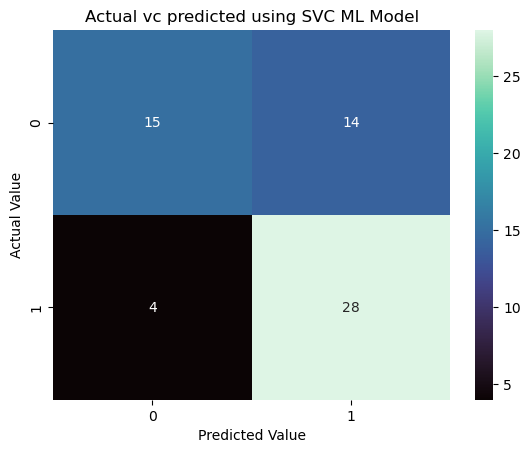

In [65]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vc predicted using SVC ML Model')
sns.heatmap(cm,annot = True, cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [66]:
svc_score = accuracy_score(y_test,y_pred)

In [70]:
lr_score, nv_score, svc_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

## STEP 5.4 Decision Tree ML Model 

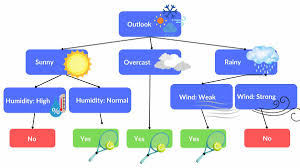

In [72]:
# Iris FLower-----> (4 information)
# ---> Sepal length
# ---> Sepal width
# ---> Petal length
# ---> Petal width



#Iris Flower Species (3)
# ---> Versicolor
# ---> Setosa
# ---> Virginica



#Decision node:
    #

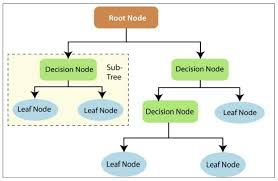

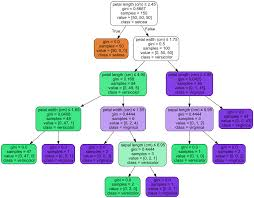

### STEP 5.4.1 Import Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeClassifier 

In [82]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

### STEP 5.4.2 Predict y_pred

In [83]:
y_pred = model_dt.predict(X_test)

In [84]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F_1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.819672131147541
Precision Score 0.8888888888888888
Recall Score 0.75
F_1 Score 0.8135593220338984


In [89]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.819672131147541

In [86]:
from sklearn.tree import plot_tree


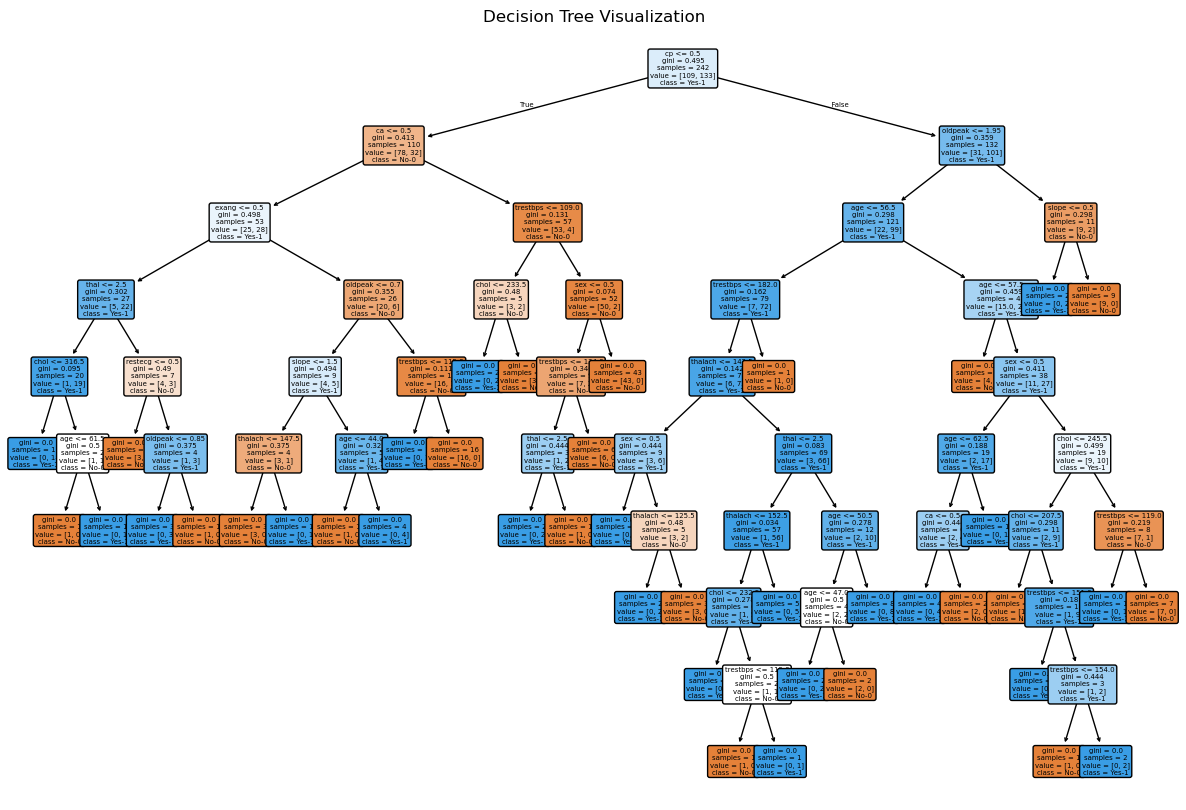

In [87]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

## STEP 5.5 Ensemble ML Model
- bagging technique
- boosting technique

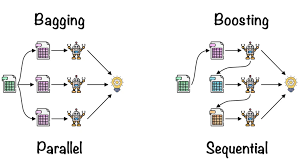

In [91]:
#Ensemble--> It means that, group of model
#Bagging--> Bags of  multiple ML model, and each model give it's prediction/classification, final outcome based on majority
#Boosting--> Next model, will learn from previous model and boost it , minimize errors to improve score

### STEP 5.5.1 Bagging Technique Model>> Random Forest ML Model

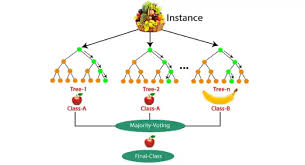

In [94]:
#Random Foresty: bags of Multiple Decision Trees Models
#Default Trees = 100
#Bagging Technique(Ensemble)

In [95]:
#Random Forest Regression Problem: Avg pf Final Value>> 2.2+2.4+2.5>> 2.36
#Random Forest Classification>> Binary/Multiclass classification>> Majority Voting

### STEP 5.5.2 Import Random Forest Model

In [101]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200)        #parameter change(Default tree = 100 to 200)
model_rf.fit(X_train,y_train)      # learning

RandomForestClassifier(n_estimators=200)

### STEP 5.5.3 y_pred prediction based on X_test

In [102]:
y_pred = model_rf.predict(X_test)

In [103]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F_1 Score',f1_score(y_test,y_pred))

Accuracy Score 0.8524590163934426
Precision Score 0.8484848484848485
Recall Score 0.875
F_1 Score 0.8615384615384616


In [104]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.8524590163934426

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



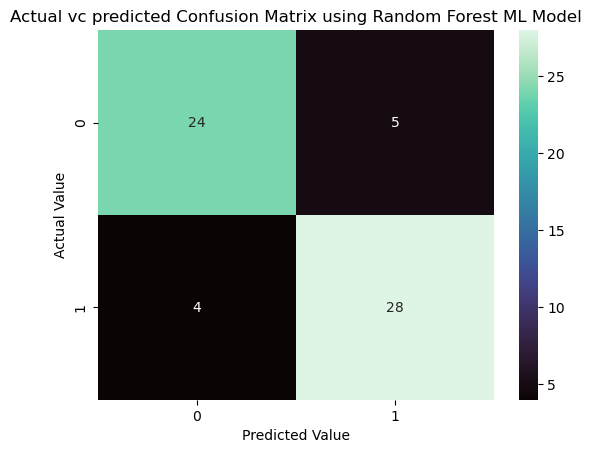

In [106]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vc predicted Confusion Matrix using Random Forest ML Model')
sns.heatmap(cm,annot = True, cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# STEP 5.6 Ensemble Boosting Technique: Adaboost, Gradientboost, XGboost

In [109]:
# Adaboost: Adaptive Boosting
# Gradientboost: GBM
# LBM: Gradientboost: LGBM   (Light Gradient Boosting Model)
# XGboost: Extreme Gradient Boosting: 
# Catboost: Categorial: textual data:

In [110]:
# XGboost: Extreme Gradient Boosting: 

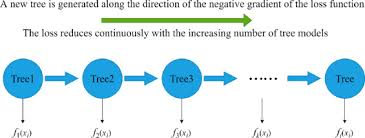

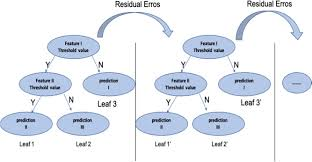

### STEP 5.6.1 Import XGboost ML Algorithm

In [112]:
#pip install xgboost

In [113]:
import xgboost
print('done')

done


In [123]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()       #hyperparameters: Model Fine Tune objective ='binary:logistics', random_state=42, learning_rate=0.001

model_xgb.fit(X_train,y_train)       #NONE:hyperparameters: Model Fine Tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [124]:
y_pred = model_xgb.predict(X_test)

In [125]:
xgb_score=accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

## STEP 5.7 KNN

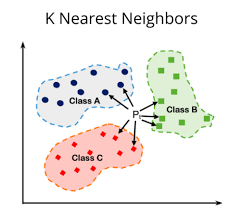

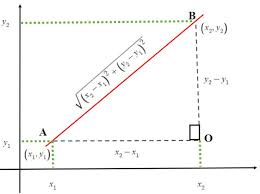

### STEP 5.7.1 Import KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
model_knn = KNeighborsClassifier(n_neighbors=14)      #k=14

model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [134]:
y_pred = model_knn.predict(X_test)

In [135]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

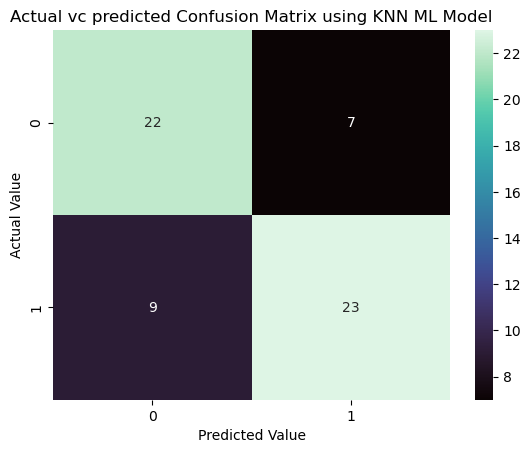

In [136]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vc predicted Confusion Matrix using KNN ML Model')
sns.heatmap(cm,annot = True, cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## STEP 5.8 Artificial Neural Network using Deep Learning

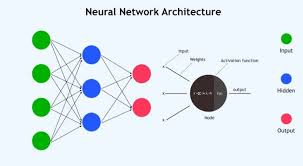

In [139]:
#ML works on limited data 
#If input changes, ML model fail (8features col: 8)


In [140]:
# Deep Learning: dense(Deep) Neural Network: trained on multiple possibilities

In [143]:
# keras tensor flow:
# tensor: array

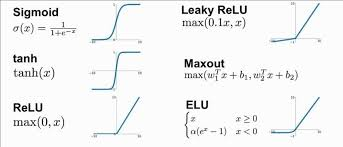

### STEP 5.8.1 ANN Model Creation

In [146]:
#pip install keras


In [148]:
#pip install tensorflow

In [149]:
from keras.models import Sequential
from keras.layers import Dense

### STEP 5.8.2 Model Building

In [150]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim =13))  #DENSE layer
model.add(Dense(1,activation='sigmoid')) #Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',        #loss to calculate model loss
             optimizer='adam',                   #optimizer to optimize model learning
             metrics=['accuracy'])               #metrics return accuracy score


print('done')

done


### STEP 5.8.3 Model Training

In [151]:
model.fit(X_train,y_train,epochs=300)      #iteration during retraining epochs=300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.4504 - loss: 64.7683
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4504 - loss: 57.3452 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4504 - loss: 50.1383 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4504 - loss: 42.7526 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4545 - loss: 35.3461 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4545 - loss: 28.1709 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4380 - loss: 21.1364 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4380 - loss: 15.2235 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3636 - loss: 11.6414 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3802 - loss: 10.1763
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4132 - loss: 9.6862 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - ac

### STEP 5.8.4 pred y_value

In [152]:
y_pred = model.predict(X_test)
y_pred = [round(i[0]) for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [153]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8524590163934426

In [154]:
lr_score

0.8852459016393442

# STEP 6 All Model Comparison

In [157]:
all_model_score = [lr_score,nv_score,svc_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','KNN','ANN']
print('done')
#print(len(all_model_score))

done


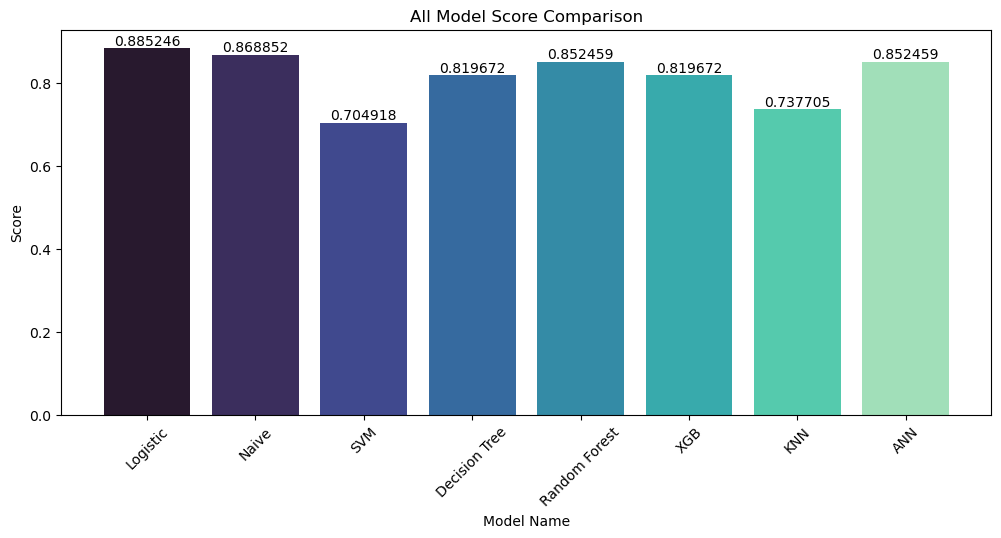

In [160]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x=model_name, height = all_model_score, color=sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# STEP 7 Best Model SAVE

In [161]:
#lr has hieghest score so the Final Model is Logistic Regression

In [162]:
import pickle
with open('heart_disease_pred.pkl','wb')as f:
    pickle.dump(model_lr,f)

print('done')
    

done
